In [1]:
import pandas as pd
from itertools import product # Om de waarheidstabel te printen
from Perceptron import *
from PerceptronLayer import *
from PerceptronNetwork import *


In [2]:
def print_table(f, number):
    """In deze functie maak en print ik de waarheidstabel
    'number' staat voor het aantal inputs dat de perceptron/netwerk vereist."""
    columns = []
    for item in range(number+1):
        if item == number:
            columns.append('Output')
        else: 
            columns.append('x'+str(item+1))

    data = [list(x) + [f(list(x))] for x in product([False,True], repeat=number)]
    df = pd.DataFrame.from_records(data, columns=columns)
    print('<Waarheidstabel>\n',df)

## Perceptron unit

#### NOT

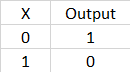

In [3]:
"""Invert Test"""

p_not = Perceptron('NOT', 0.5, [-1])
print(p_not)

print_table(p_not.activation, 1)


<NOT port>
- Bias = 0.5
- Weights = [-1]

Input: [False] 
0*-1 + 0.5(bias) = 0


Input: [True] 
1*-1 + 0.5(bias) = -1

<Waarheidstabel>
       x1  Output
0  False    True
1   True   False


#### AND
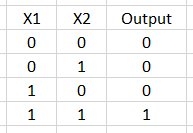


In [4]:
"""AND Test"""

p_and = Perceptron('AND', -1.5, [1, 1])
print(p_and)

print_table(p_and.activation, 2)


<AND port>
- Bias = -1.5
- Weights = [1, 1]

Input: [False, False] 
0*1 + 0*1 + -1.5(bias) = 0


Input: [False, True] 
0*1 + 1*1 + -1.5(bias) = 1


Input: [True, False] 
1*1 + 0*1 + -1.5(bias) = 1


Input: [True, True] 
1*1 + 1*1 + -1.5(bias) = 2

<Waarheidstabel>
       x1     x2  Output
0  False  False   False
1  False   True   False
2   True  False   False
3   True   True    True


#### OR
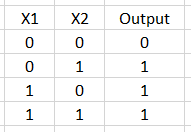

In [5]:
"""OR Test"""

p_or = Perceptron('OR', -0.5, [0.5, 0.5])
print(p_or)

print_table(p_or.activation, 2)

<OR port>
- Bias = -0.5
- Weights = [0.5, 0.5]

Input: [False, False] 
0*0.5 + 0*0.5 + -0.5(bias) = 0.0


Input: [False, True] 
0*0.5 + 1*0.5 + -0.5(bias) = 0.5


Input: [True, False] 
1*0.5 + 0*0.5 + -0.5(bias) = 0.5


Input: [True, True] 
1*0.5 + 1*0.5 + -0.5(bias) = 1.0

<Waarheidstabel>
       x1     x2  Output
0  False  False   False
1  False   True    True
2   True  False    True
3   True   True    True


#### Nor
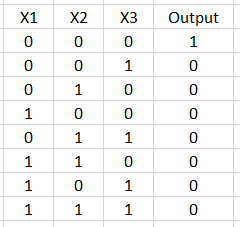



In [6]:
"""NOR Test"""

p_nor = Perceptron('NOR', 0, [-1, -1, -1])
print(p_nor)

print_table(p_nor.activation, 3)

<NOR port>
- Bias = 0
- Weights = [-1, -1, -1]

Input: [False, False, False] 
0*-1 + 0*-1 + 0*-1 + 0(bias) = 0


Input: [False, False, True] 
0*-1 + 0*-1 + 1*-1 + 0(bias) = -1


Input: [False, True, False] 
0*-1 + 1*-1 + 0*-1 + 0(bias) = -1


Input: [False, True, True] 
0*-1 + 1*-1 + 1*-1 + 0(bias) = -2


Input: [True, False, False] 
1*-1 + 0*-1 + 0*-1 + 0(bias) = -1


Input: [True, False, True] 
1*-1 + 0*-1 + 1*-1 + 0(bias) = -2


Input: [True, True, False] 
1*-1 + 1*-1 + 0*-1 + 0(bias) = -2


Input: [True, True, True] 
1*-1 + 1*-1 + 1*-1 + 0(bias) = -3

<Waarheidstabel>
       x1     x2     x3  Output
0  False  False  False    True
1  False  False   True   False
2  False   True  False   False
3  False   True   True   False
4   True  False  False   False
5   True  False   True   False
6   True   True  False   False
7   True   True   True   False


## Perceptron netwerk

#### XOR
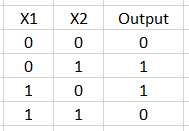

In [7]:
    p1 = Perceptron('P1 [AND]', -1, [0.5, 0.5])
    p2 = Perceptron('P2 [OR]', -1, [1, 1])
    p3 = Perceptron('P2 [XOR]', -1, [-1, 1])

    layer1 = PerceptronLayer('Laag-1 [Hidden]', [p1, p2])
    layer2 = PerceptronLayer('Laag-2 [Output]', [p3])

    network_xor = PerceptronNetwork([layer1, layer2])

    
    print_table(network_xor.feed_forward, 2)
    
 

----------------------------------------
<Laag-1 [Hidden]> - Deze layer bestaat uit 2 Perceptrons

<P1 [AND] port>
- Bias = -1
- Weights = [0.5, 0.5]

Input: [False, False] 
0*0.5 + 0*0.5 + -1(bias) = 0.0

<P2 [OR] port>
- Bias = -1
- Weights = [1, 1]

Input: [False, False] 
0*1 + 0*1 + -1(bias) = 0

----------------------------------------
<Laag-2 [Output]> - Deze layer bestaat uit 1 Perceptrons

<P2 [XOR] port>
- Bias = -1
- Weights = [-1, 1]

Input: [False, False] 
0*-1 + 0*1 + -1(bias) = 0

----------------------------------------
<Laag-1 [Hidden]> - Deze layer bestaat uit 2 Perceptrons

<P1 [AND] port>
- Bias = -1
- Weights = [0.5, 0.5]

Input: [False, True] 
0*0.5 + 1*0.5 + -1(bias) = 0.5

<P2 [OR] port>
- Bias = -1
- Weights = [1, 1]

Input: [False, True] 
0*1 + 1*1 + -1(bias) = 1

----------------------------------------
<Laag-2 [Output]> - Deze layer bestaat uit 1 Perceptrons

<P2 [XOR] port>
- Bias = -1
- Weights = [-1, 1]

Input: [False, True] 
0*-1 + 1*1 + -1(bias) = 1

---

#### Half-adder
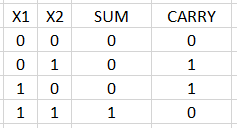

In [8]:
# Laag 1
p1 = Perceptron('P1', -1, [1, 0])
p2 = Perceptron('NAND', 1.5, [-1, -1])
p3 = Perceptron('P3', -1, [0, 1])
layer1 = PerceptronLayer('Layer-1 [Hidden]', [p1, p2, p3])

# Laag 2
p4 = Perceptron('NAND', 1.5, [-1, -1, 0])
p5 = Perceptron('NAND', 1.5, [0, -1, -1])
p6 = Perceptron('P9', -1, [0, 1, 0])
layer2 = PerceptronLayer('Layer-2 [Hidden]', [p4, p5, p6])

# Laag 3
p7 = Perceptron('SUM [NAND]', 1.5, [-1, -1, 0])
p8 = Perceptron('CARRY [NAND]', 1.5, [0, 0, -2])
layer3 = PerceptronLayer('Layer-3 [Hidden]', [p7, p8])

network_adder = PerceptronNetwork([layer1, layer2, layer3])

print_table(network_adder.feed_forward, 2)
"""De output is een beetje raar, dit is [Sum, Carry] Dit fixen was onnodig veel werk omdat het alleen maar is
om het te laten zien/bewijzen"""

----------------------------------------
<Layer-1 [Hidden]> - Deze layer bestaat uit 3 Perceptrons

<P1 port>
- Bias = -1
- Weights = [1, 0]

Input: [False, False] 
0*1 + 0*0 + -1(bias) = 0

<NAND port>
- Bias = 1.5
- Weights = [-1, -1]

Input: [False, False] 
0*-1 + 0*-1 + 1.5(bias) = 0

<P3 port>
- Bias = -1
- Weights = [0, 1]

Input: [False, False] 
0*0 + 0*1 + -1(bias) = 0

----------------------------------------
<Layer-2 [Hidden]> - Deze layer bestaat uit 3 Perceptrons

<NAND port>
- Bias = 1.5
- Weights = [-1, -1, 0]

Input: [False, True, False] 
0*-1 + 1*-1 + 0*0 + 1.5(bias) = -1

<NAND port>
- Bias = 1.5
- Weights = [0, -1, -1]

Input: [False, True, False] 
0*0 + 1*-1 + 0*-1 + 1.5(bias) = -1

<P9 port>
- Bias = -1
- Weights = [0, 1, 0]

Input: [False, True, False] 
0*0 + 1*1 + 0*0 + -1(bias) = 1

----------------------------------------
<Layer-3 [Hidden]> - Deze layer bestaat uit 2 Perceptrons

<SUM [NAND] port>
- Bias = 1.5
- Weights = [-1, -1, 0]

Input: [True, True, True] 


'De output is een beetje raar, dit is [Sum, Carry] Dit fixen was onnodig veel werk omdat het alleen maar is\nom het te laten zien/bewijzen'